In [1]:
import pandas as pd
import re

df = pd.read_csv('아파트(매매)__실거래가_20220809220723.csv', encoding='cp949')
#df

In [2]:
# 콤마를 제거하는 replace 추가
df.가격 = df.가격.str.replace(',', '').astype('int64')

df.가격>1000000


0        False
1        False
2        False
3        False
4        False
         ...  
15298    False
15299    False
15300    False
15301    False
15302    False
Name: 가격, Length: 15303, dtype: bool

In [5]:
df.면적 > 84

# 면적>84 인 모든 자료 출력
df[df.면적 > 84]

,지역,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,202207,19,33500,3,2005,경강로2539번길 22,NaN,중개거래,강원 강릉시
3,강원도 강릉시 교동,1767,1767,0,교동2현대,84.9700,202207,6,46700,14,1999,교동광장로 138-15,NaN,중개거래,강원 강릉시
5,강원도 강릉시 교동,357,357,0,교동이-편한세상,123.7566,202207,18,55500,4,2006,종합운동장길 92,NaN,중개거래,강원 강릉시
6,강원도 강릉시 교동,1780,1780,0,부영3차,84.9300,202207,12,35000,5,2001,하슬라로 124,NaN,직거래,-
7,강원도 강릉시 교동,1780,1780,0,부영3차,84.9300,202207,26,28000,5,2001,하슬라로 124,NaN,직거래,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15223,충청북도 충주시 칠금동,626,626,0,삼일,102.7100,202207,15,24500,4,1996,금릉로 17,NaN,중개거래,충북 충주시
15224,충청북도 충주시 칠금동,628,628,0,세영첼시빌,84.9900,202207,7,26000,10,2002,금릉로 33,NaN,중개거래,충북 충주시
15225,충청북도 충주시 칠금동,825,825,0,코오롱동신,84.8700,202207,7,24400,3,1997,금릉로 14,NaN,중개거래,충북 충주시
15264,충청북도 충주시 호암동,906,906,0,세영더-조은,131.2013,202207,8,37000,9,2007,형설로 32,NaN,중개거래,충북 충주시


In [7]:
# 면적>84인 데이터 중 지역만 출력
df.지역[df.면적 > 84]

2         강원도 강릉시 견소동
3          강원도 강릉시 교동
5          강원도 강릉시 교동
6          강원도 강릉시 교동
7          강원도 강릉시 교동
             ...     
15223    충청북도 충주시 칠금동
15224    충청북도 충주시 칠금동
15225    충청북도 충주시 칠금동
15264    충청북도 충주시 호암동
15265    충청북도 충주시 호암동
Name: 지역, Length: 5155, dtype: object

In [9]:
df.가격[(df.면적 > 84) & (df.가격 < 30000)]

7        28000
20       26000
23       12300
24       25400
25       24800
         ...  
15222    27000
15223    24500
15224    26000
15225    24400
15265    26000
Name: 가격, Length: 2299, dtype: int64

In [8]:
df.가격[(df.면적 > 84) | (df.가격 < 30000)]

0        16000
1        22900
2        33500
3        46700
5        55500
         ...  
15298     6500
15299     6500
15300     6500
15301     4700
15302    13300
Name: 가격, Length: 13921, dtype: int64

In [10]:
#df.loc[원하는 행의 조건, 원하는 열의 조건]
df.loc[:10, ['단지명', '면적', '가격']]

,단지명,면적,가격
0,송정한신,43.3800,16000
1,송정한신,59.8000,22900
2,송정해변신도브래뉴아파트,84.9900,33500
3,교동2현대,84.9700,46700
4,교동3주공,59.7400,32000
5,교동이-편한세상,123.7566,55500
6,부영3차,84.9300,35000
7,부영3차,84.9300,28000
8,부영5,84.9300,42500
9,부영6,84.9763,44000


In [17]:
# df['새로운 열 이름'] = 넣고 싶은 값
df['단가'] = df.가격 / df.면적

In [18]:
#오름차순
df.sort_values(by='가격').loc[:, ('가격', '지역')]

,가격,지역
212,800,강원도 삼척시 도계읍 도계리
5996,1000,경상북도 칠곡군 약목면 관호리
821,1000,강원도 태백시 동점동
6000,1200,경상북도 칠곡군 약목면 관호리
13990,1300,충청남도 천안서북구 성거읍 요방리
...,...,...
9283,480000,서울특별시 강남구 도곡동
9671,490000,서울특별시 용산구 한강로2가
1555,490000,경기도 성남분당구 백현동
9288,500000,서울특별시 강남구 도곡동


In [19]:
#내림차순
df.sort_values(by='가격', ascending=False).loc[:, ('가격', '지역', '면적', '단지명')]

,가격,지역,면적,단지명
9294,800000,서울특별시 강남구 압구정동,196.210,"현대1차(12,13,21,22,31,32,33동)"
9288,500000,서울특별시 강남구 도곡동,244.550,힐데스하임빌라
1555,490000,경기도 성남분당구 백현동,229.033,THESHARP판교퍼스트파크
9671,490000,서울특별시 용산구 한강로2가,191.110,아스테리움용산
9283,480000,서울특별시 강남구 도곡동,174.670,타워팰리스1
...,...,...,...,...
13990,1300,충청남도 천안서북구 성거읍 요방리,27.540,늘푸른동해
6000,1200,경상북도 칠곡군 약목면 관호리,31.620,성재
821,1000,강원도 태백시 동점동,39.720,동점
5996,1000,경상북도 칠곡군 약목면 관호리,31.620,성재


In [20]:
df[df.가격 > 100000].sort_values(by='면적').loc[:, ('가격', '지역', '면적', '단지명')]

,가격,지역,면적,단지명
9291,102000,서울특별시 강남구 수서동,34.440,까치마을
9266,130500,서울특별시 강남구 개포동,39.530,성원대치2단지아파트
9271,102000,서울특별시 강남구 논현동,43.392,펜트힐루논현
9272,110000,서울특별시 강남구 논현동,43.392,펜트힐루논현
1132,125000,경기도 과천시 원문동,46.010,과천위버필드
...,...,...,...,...
1555,490000,경기도 성남분당구 백현동,229.033,THESHARP판교퍼스트파크
9257,125000,부산광역시 해운대구 중동,240.170,뷔센하우스
8277,136200,부산광역시 강서구 명지동,244.190,엘크루블루오션
9288,500000,서울특별시 강남구 도곡동,244.550,힐데스하임빌라


In [23]:
#df.검색할 열.str.find('찾는 문자열') : 문자열의 인덱스를 반환. 없으면 -1반환
df.지역.str.find('대구')

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
15298   -1
15299   -1
15300   -1
15301   -1
15302   -1
Name: 지역, Length: 15303, dtype: int64

In [27]:
# 강릉을 찾아서 대구광역시가 들어가는 데이터를 모두 출력
df[df.지역.str.find('대구광역시') > -1]

#대구가 들어가는 모든 데이터 출력
#df.loc[df['지역'].str.contains(r'대구')]

#추출된것을 dg 에 저장
dg=df[df.지역.str.find('대구광역시') > -1]

dg.mean()  #평균

C:\Users\dasom\AppData\Local\Temp\ipykernel_15888\2821734487.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dg.mean()


본번                  inf
부번         2.713092e+00
면적         7.534773e+01
계약년월       2.022070e+05
계약일        1.333008e+01
가격         3.102286e+04
층          1.044011e+01
건축년도       2.004728e+03
해제사유발생일    2.022074e+07
단가         3.999569e+02
dtype: float64

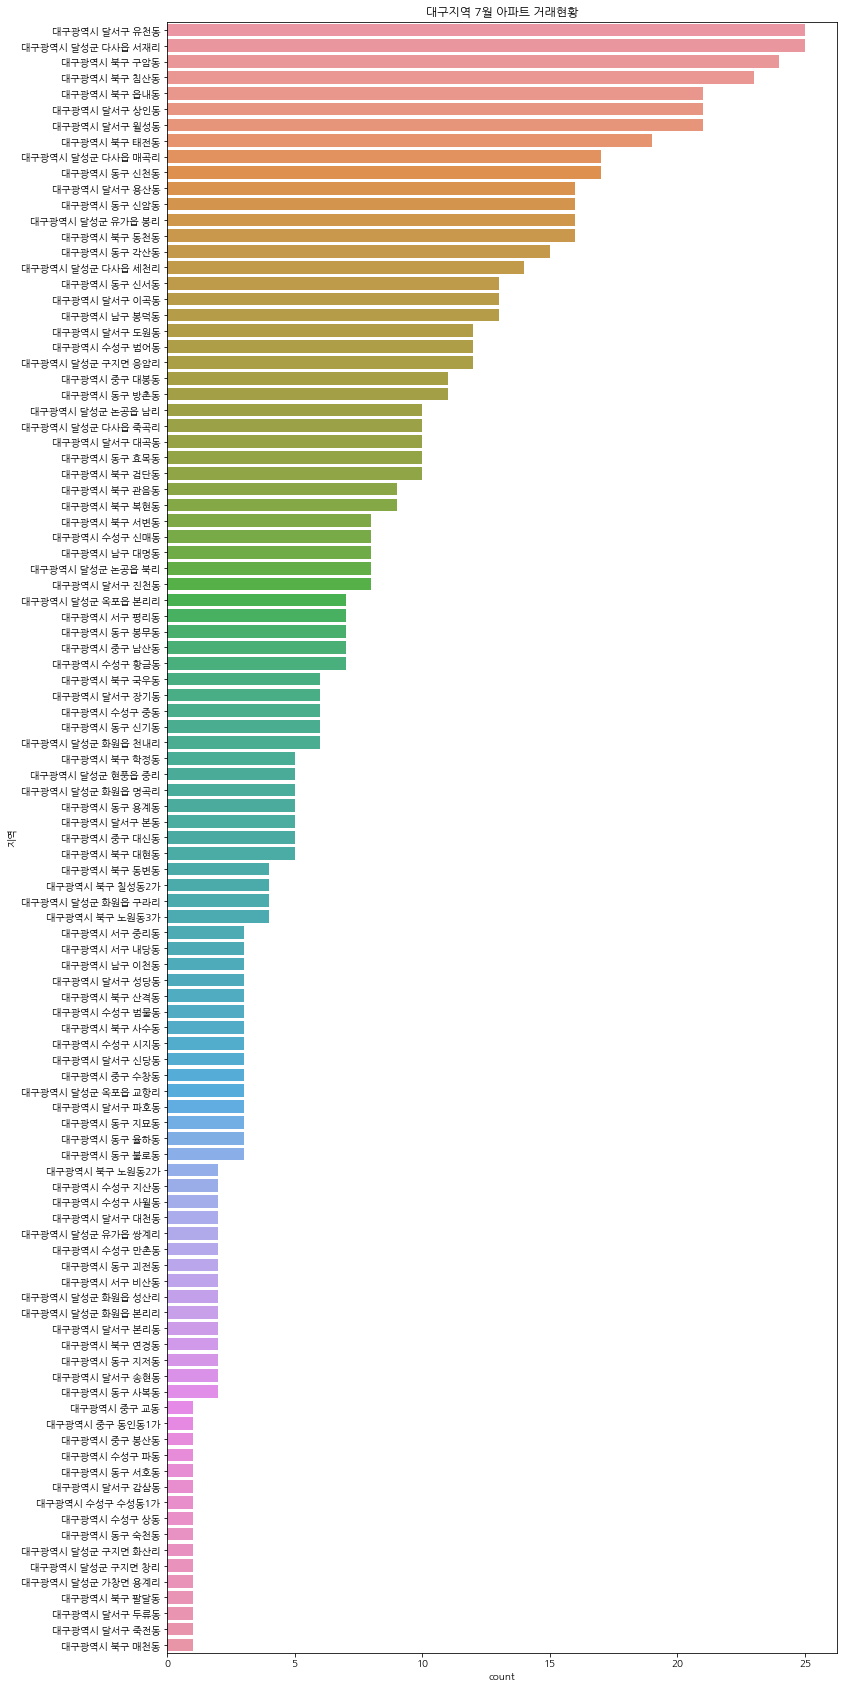

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 30))
sns.countplot(y=dg['지역'], order=dg['지역'].value_counts().index)
plt.yticks(fontsize=10)
plt.title('대구지역 7월 아파트 거래현황')
plt.show()

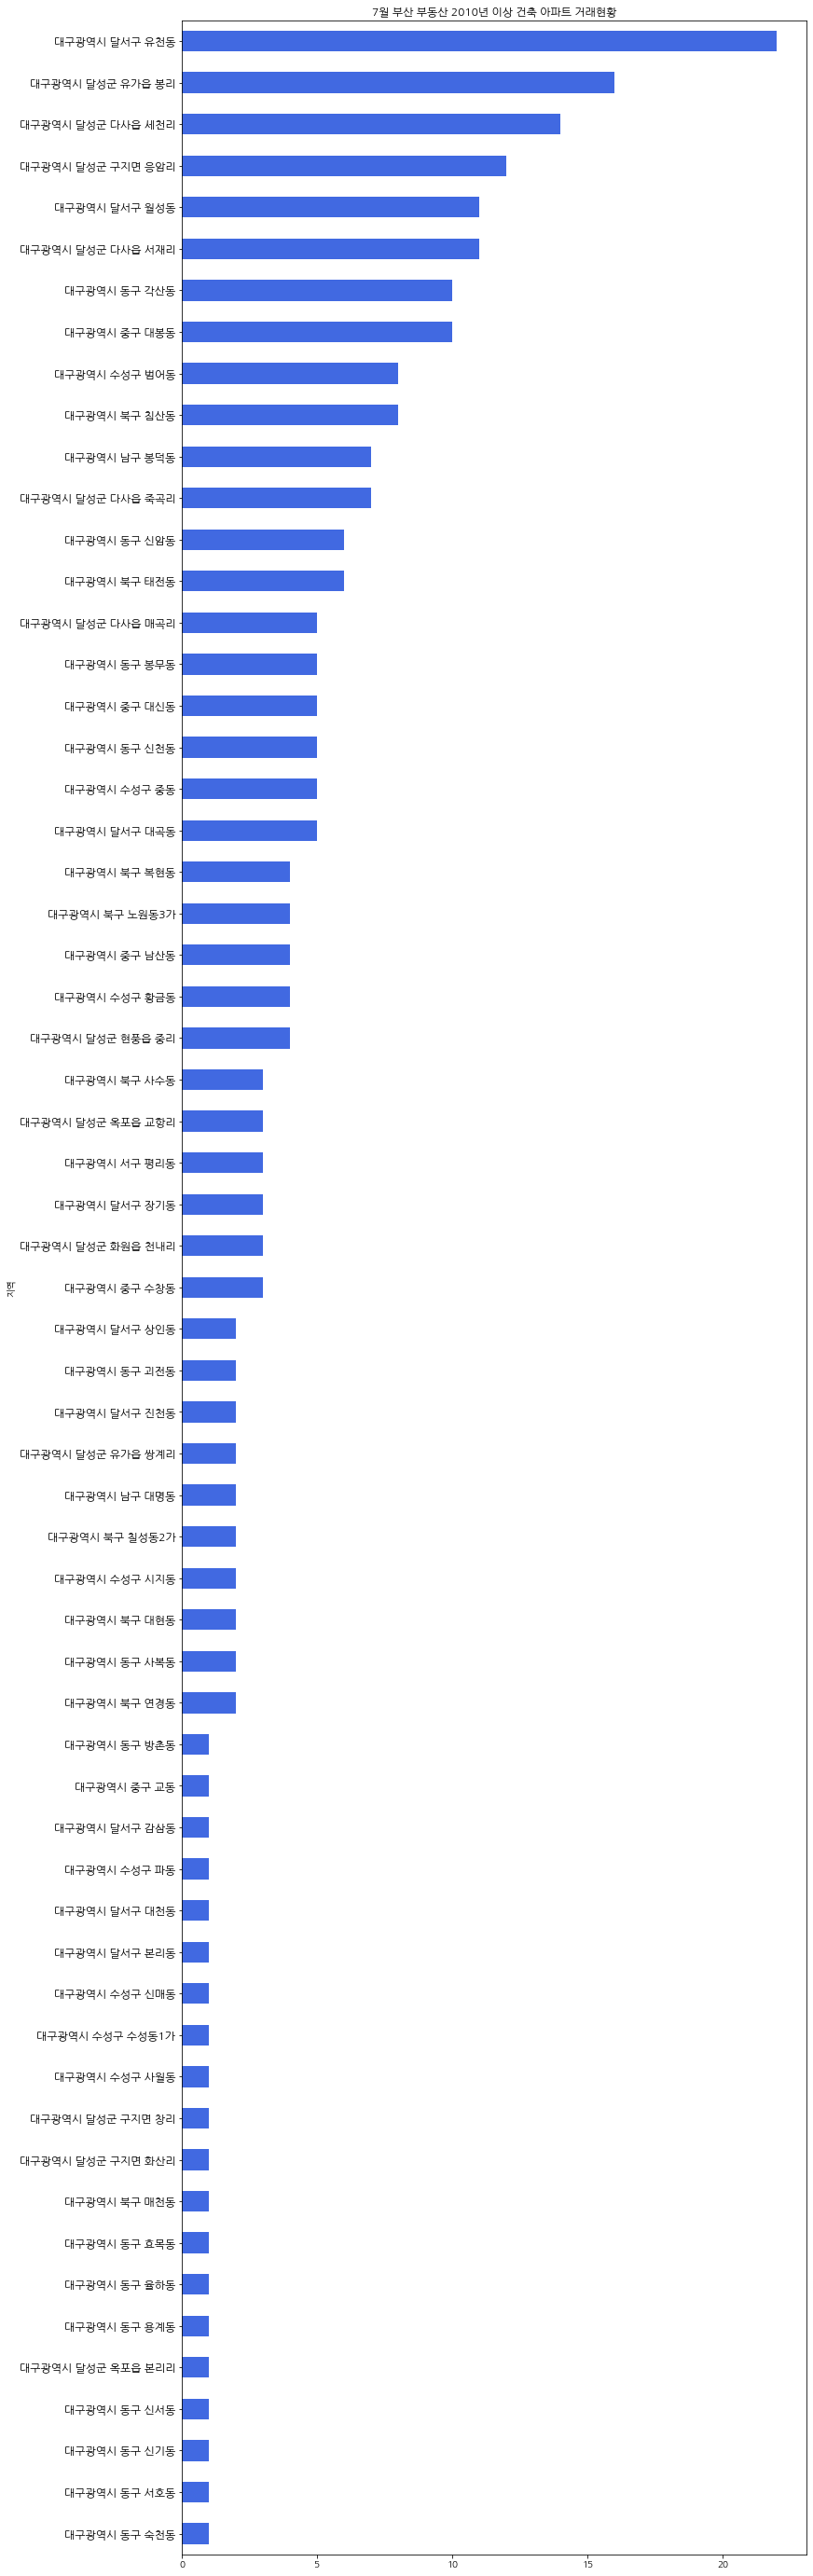

In [39]:
plt.figure(figsize=(12, 50))
dg.loc[dg['건축년도'] > 2010].groupby('지역')['건축년도'].count().sort_values().plot(kind='barh', color='royalblue')

plt.yticks(fontsize=12)
plt.title('7월 부산 부동산 2010년 이상 건축 아파트 거래현황')

plt.show()

In [49]:
#dg = df[df.지역.str.find('대구광역시') > -1]
#sg = dg[dg.지역.str.find('서구') > -1]
#sg # 달서구랑 서구 다나옴.

sg=dg[dg.지역.str.find('서구') == 6] #str.find에서 6번째가 "서구"로 시작
sg

,지역,단지명,면적,가격,건축년도
7736,대구광역시 서구 내당동,삼익뉴타운,46.2100,25600,1980
7737,대구광역시 서구 내당동,삼익뉴타운,46.1350,18000,1980
7738,대구광역시 서구 내당동,코오롱맨션,74.6550,30000,1985
7739,대구광역시 서구 비산동,경남꿈드림,84.7600,21500,2004
7740,대구광역시 서구 비산동,비산시영,44.2300,8200,1979
7741,대구광역시 서구 중리동,일신(720-1),55.1200,20000,1982
7742,대구광역시 서구 중리동,중리광명,84.9600,33000,1983
7743,대구광역시 서구 중리동,중리롯데캐슬,84.9840,31900,2009
7744,대구광역시 서구 평리동,평리동서3차아파트,61.2900,28000,1983
7745,대구광역시 서구 평리동,평리롯데캐슬,84.9639,35500,2009
